# Slice Windows

This uses python 3.

Load with anaconda shell then activate py36 environment

`$> activate py36`

In [1]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)

In [2]:
import inspect
import os
import sys

import imutils
import cv2

%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

import time
import pathlib

In [3]:
# filename = inspect.getframeinfo(inspect.currentframe()).filename
HOME = os.environ.get('HOME_PATH')
FRAMES_PATH = os.path.join(HOME, "frames")
SAMPLE_VIDEO = '20180326_071412_NF.mp4'
SAMPLE_IMAGE = 'frame-001.png'
SAMPLE_IMAGE_PATH = os.path.join(FRAMES_PATH, SAMPLE_VIDEO, SAMPLE_IMAGE)

In [ ]:
SAMPLE_IMAGE_PATH

In [9]:
def getImage(path):
    image = cv2.imread(path)
    image = image.reshape((1080, 1920,3))
    return image

def showImage(image):
    image = image[:, :, ::-1] # Swap R and B channels. Converts from BGR to RGB
    plt.figure(num=None, figsize=(10 ,10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow( image )

In [10]:
def pyramid(image, scale=1.5, minSize=(100, 50)):
    # yield the original image
    yield image
 
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
 
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
 
        # yield the next image in the pyramid
        yield image

In [11]:
image = getImage(SAMPLE_IMAGE_PATH)

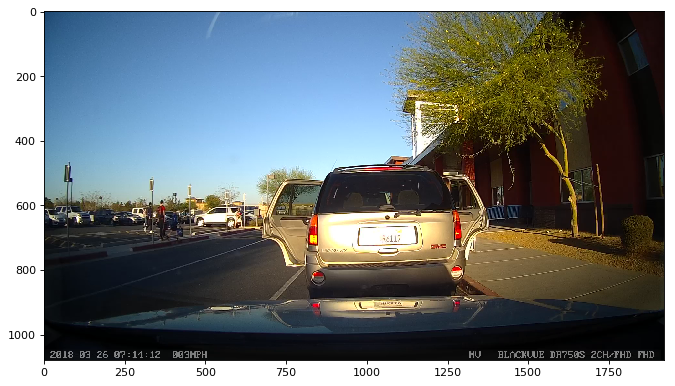

In [12]:
showImage(image)

In [13]:
def getPyramidImages(image):
    # Method 1
    startSize = 24
    scale=1.66
    for (i, resized) in enumerate(pyramid(image, scale=scale)):
             
        # show the resized image
        startSize = startSize /  scale
        plt.figure(num=None, figsize=(startSize ,startSize), dpi=80, facecolor='w', edgecolor='k')
        resized = resized[:, :, ::-1]
        plt.imshow( resized )
    #     cv2.imshow("Layer {}".format(i + 1), resized)
    #     cv2.waitKey(0)

 

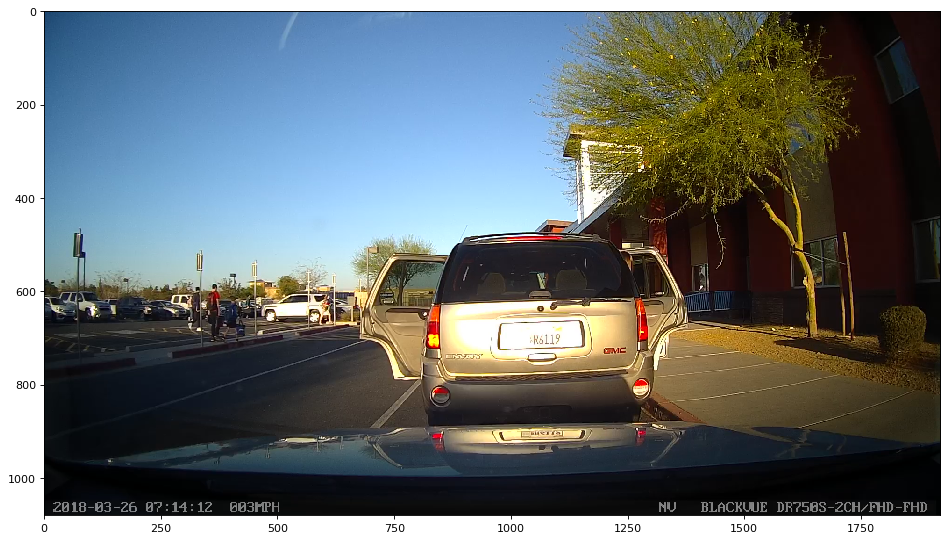

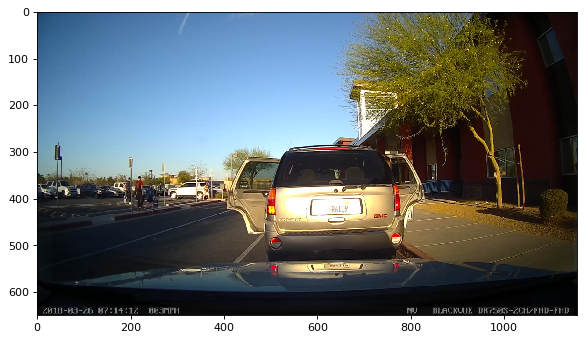

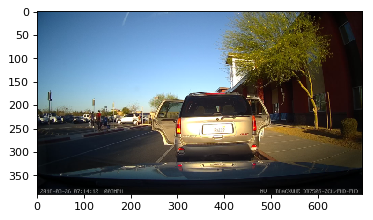

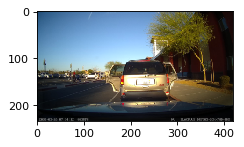

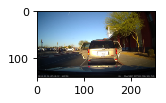

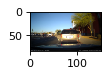

In [14]:
frameName = "frame-001.png"
src =  os.path.join(FRAMES_PATH, SAMPLE_VIDEO, frameName)
image = getImage(src)
getPyramidImages(image)

In [15]:
from skimage.transform import pyramid_gaussian

In [16]:
def getPyramidImagesGaussian(image):
    # Method 2
    startSize = 24
    scale=4
    for (i, resized) in enumerate(pyramid_gaussian(image, downscale=scale)):
        # if the image is too small, break from the loop
        if resized.shape[0] < 30 or resized.shape[1] < 30:
            break

        # show the resized image
        startSize = startSize /  scale
        plt.figure(num=None, figsize=(startSize ,startSize), dpi=80, facecolor='w', edgecolor='k')
        resized = resized[:, :, ::-1]
        plt.imshow( resized )

In [17]:
def buildImageName(src, x, y, scale=1):
    parts =  src.split('\\')
    videoFile = parts[-2]
    videoFileName = videoFile.split('.')[0]
    
    frameNo = parts[-1].split('.')[0].split('-')[1]
    
    return videoFileName + '-' + frameNo + '-' + str(scale) + '-' + str(x) + '-' + str(y) + '.jpg'

# Get 100x100 window
def sliding_window(image, stepSize=20, windowSize=(100,50)):
    
    winW = windowSize[0]
    winH = windowSize[1]
    
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            
            window = image[y:y+windowSize[1],x:x+windowSize[0]]
            
            # if the window does not meet our desired window size, ignore it
            if window.shape[0] != winH or window.shape[1] != winW:
                continue
                
            # yield the current window
            yield (x, y, window)
            

# Ideal window size on full size image is 100x50 with step size = 10px
def splitWindowsFromFrames(src, dest, scale=1):
    
    # create dest if it doesnt' exist
    pathlib.Path(dest).mkdir(parents=True, exist_ok=True) 
    
    for (i, resized) in enumerate(pyramid(image, scale=scale)):
        
        for x, y, window in sliding_window(resized):    

            destImageName = buildImageName(src, x, y, scale=i+1)        

            cv2.imwrite(dest + '/' + destImageName, window)


In [ ]:
src =  os.path.join(FRAMES_PATH, SAMPLE_VIDEO, frameName)
   
print(src)

print(buildImageName(src, 500,550))

In [ ]:
frameName = "frame-002.png"
src =  os.path.join(FRAMES_PATH, SAMPLE_VIDEO, frameName)
dest = os.path.join(HOME, "windows", SAMPLE_VIDEO, frameName)

print(src)
print(dest)

scale = 1.66
splitWindowsFromFrames(src, dest, scale=scale)

# References

- Guide to Sliding Windows https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/
- Resize images with Scikit http://scikit-image.org/docs/dev/api/skimage.transform.html#pyramid-gaussian
- Resize images with imutils https://www.pyimagesearch.com/2015/03/16/image-pyramids-with-python-and-opencv/